In [ ]:
# ==========================================
# STEP 1: Mount Google Drive
# ==========================================
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Change this if your folder name is different
data_dir = "/content/drive/MyDrive/ml_data"


Mounted at /content/drive


In [ ]:
# ==========================================
# STEP 2: Import Libraries
# ==========================================
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import os

In [ ]:
# ==========================================
# STEP 3: Data Preprocessing & Augmentation
# ==========================================
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

# Training data
train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical",
    subset="training"
)

# Validation data
val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)

Found 12493 images belonging to 16 classes.
Found 3118 images belonging to 16 classes.


In [ ]:
# ==========================================
# STEP 4: Build CNN Model
# ==========================================
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(128,128,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(train_gen.num_classes, activation="softmax")
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │         4,112 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,520,144 (24.87 MB)

 Trainable params: 6,520,144 (24.87 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# ==========================================
# STEP 5: Train Model with GPU
# ==========================================
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 5951s 15s/step - accuracy: 0.3890 - loss: 1.8806 - val_accuracy: 0.7152 - val_loss: 0.8596
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 116s 298ms/step - accuracy: 0.6813 - loss: 0.9437 - val_accuracy: 0.8146 - val_loss: 0.5423
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 115s 294ms/step - accuracy: 0.7698 - loss: 0.6836 - val_accuracy: 0.8345 - val_loss: 0.4721
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 114s 292ms/step - accuracy: 0.8179 - loss: 0.5432 - val_accuracy: 0.8740 - val_loss: 0.3875
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 133s 341ms/step - accuracy: 0.8302 - loss: 0.5047 - val_accuracy: 0.8974 - val_loss: 0.3216
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 115s 294ms/step - accuracy: 0.8469 - loss: 0.4435 - val_accuracy: 0.9073 - val_loss: 0.2810
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 116s 296ms/step - accuracy: 0.8613 - loss: 0.4172 - val_accuracy: 0.9157 - val_loss: 0.2495
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 116s 295ms/step - accuracy: 0.8732 - 

In [ ]:
# ==========================================
# STEP 6: Save Model to Google Drive
# ==========================================
model.save("/content/drive/MyDrive/crop_disease_model.h5")

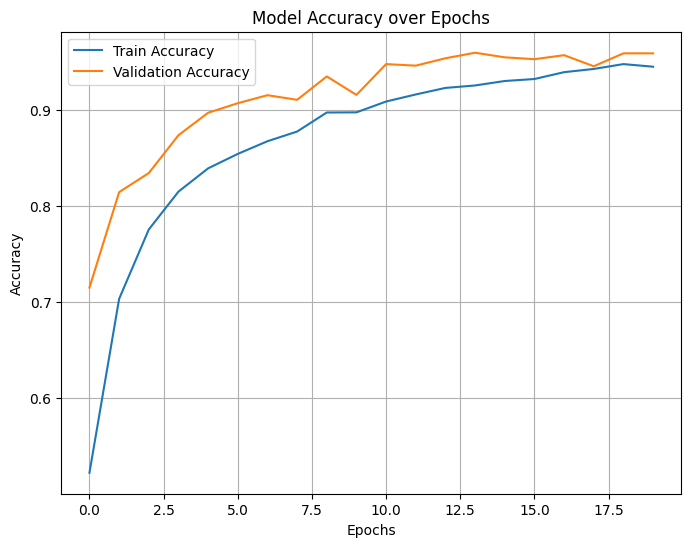

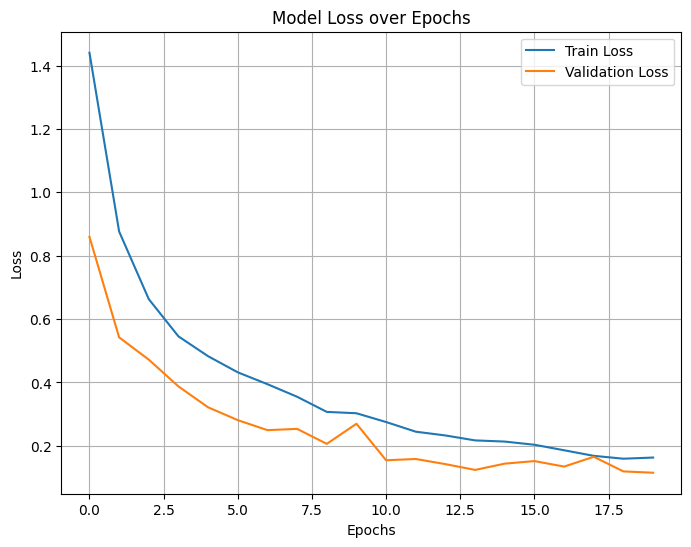

In [ ]:
# ==========================================
# STEP 6B: Plot Training Curves (Accuracy & Loss)
# ==========================================
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Loss plot
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


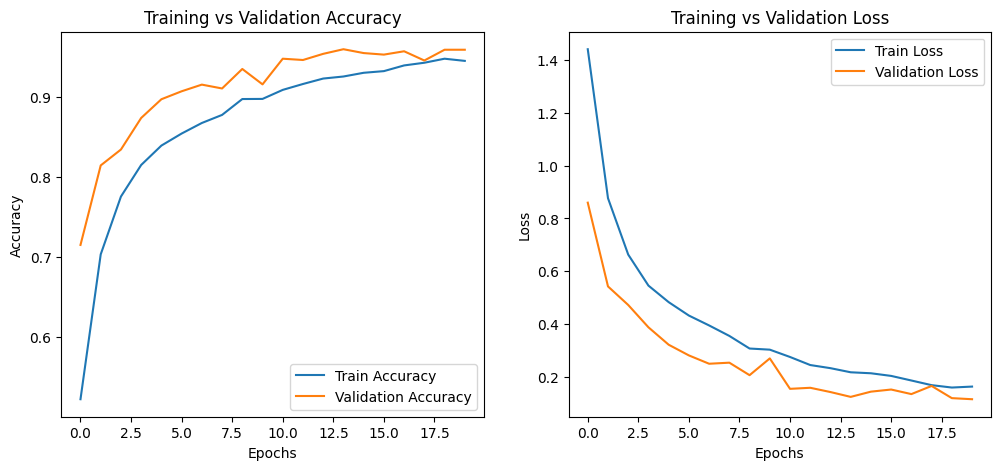

98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 245ms/step - accuracy: 0.9540 - loss: 0.1192
✅ Validation Accuracy: 95.73%
✅ Validation Loss: 0.1134


In [ ]:
# ==========================================
# STEP 7A: Plot Accuracy & Loss
# ==========================================
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")

plt.show()

# ==========================================
# STEP 7B: Evaluate Model
# ==========================================
val_loss, val_acc = model.evaluate(val_gen)
print(f"✅ Validation Accuracy: {val_acc*100:.2f}%")
print(f"✅ Validation Loss: {val_loss:.4f}")




Testing with image: /content/drive/MyDrive/ml_data/Corn_(maize)___Common_rust_/RS_Rust 1760.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
🔍 Top-3 Predictions:
Corn_(maize)___Common_rust_: 100.00%
Potato___Early_blight: 0.00%
Corn_(maize)___Northern_Leaf_Blight: 0.00%


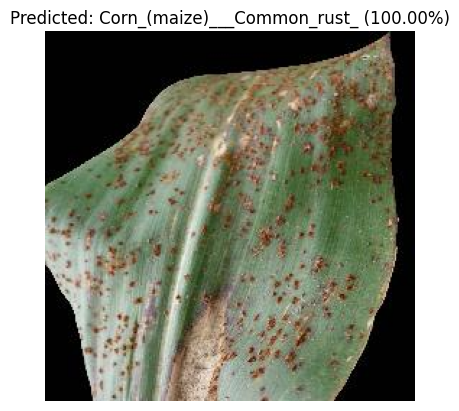

98/98 ━━━━━━━━━━━━━━━━━━━━ 30s 302ms/step


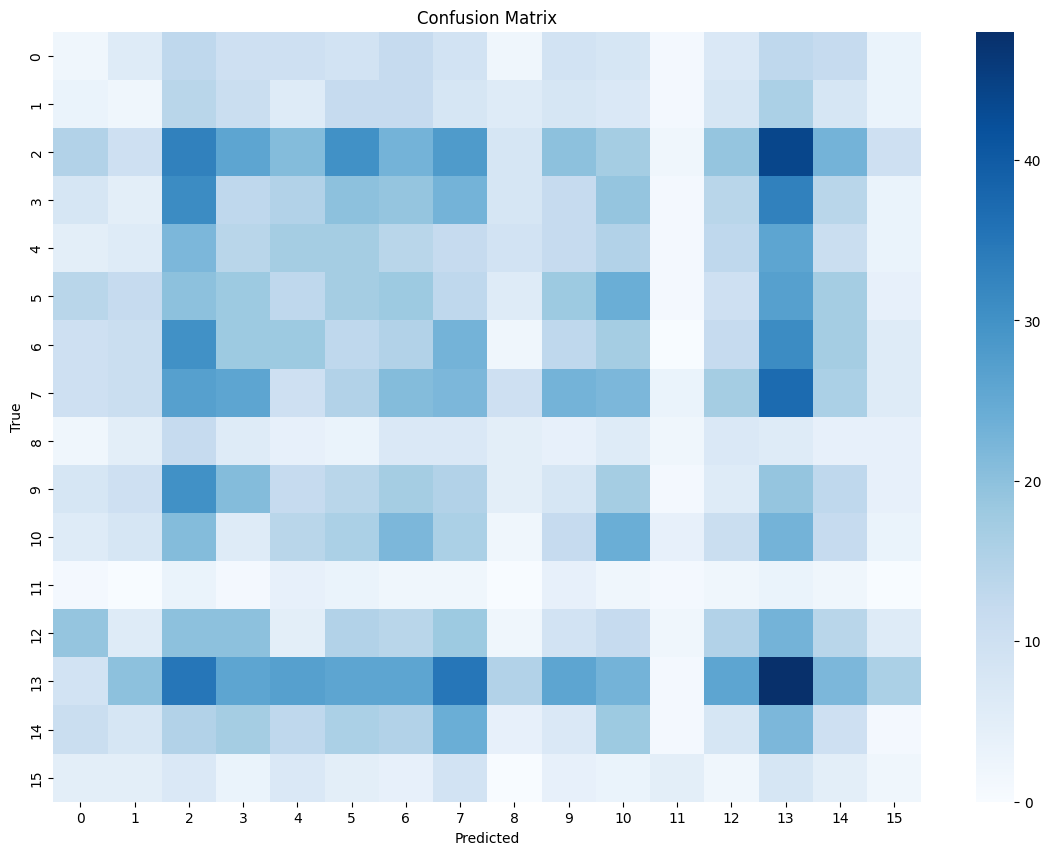

                                     precision    recall  f1-score   support

                 Apple___Apple_scab       0.02      0.02      0.02       126
                  Apple___Black_rot       0.02      0.02      0.02       125
                    Apple___healthy       0.10      0.10      0.10       329
        Corn_(maize)___Common_rust_       0.06      0.05      0.05       238
Corn_(maize)___Northern_Leaf_Blight       0.09      0.09      0.09       197
             Corn_(maize)___healthy       0.07      0.07      0.07       232
                  Grape___Black_rot       0.06      0.06      0.06       236
       Grape___Esca_(Black_Measles)       0.08      0.08      0.08       276
                    Grape___healthy       0.06      0.06      0.06        84
              Potato___Early_blight       0.04      0.04      0.04       200
               Potato___Late_blight       0.10      0.12      0.11       200
                   Potato___healthy       0.04      0.03      0.04        3

In [ ]:
# ==========================================
# STEP 7C: Predict on a Random Image (Top-3 Predictions)
# ==========================================
import os
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

# Pick a random class folder
class_name = random.choice(list(train_gen.class_indices.keys()))
class_path = os.path.join(data_dir, class_name)

# Pick a random image from that folder
img_name = random.choice(os.listdir(class_path))
img_path = os.path.join(class_path, img_name)

print("Testing with image:", img_path)

# Load & preprocess
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict probabilities
pred = model.predict(img_array)[0]

# Sort predictions (Top-3)
top3_idx = pred.argsort()[-3:][::-1]   # highest 3 indexes
top3_classes = [list(train_gen.class_indices.keys())[i] for i in top3_idx]
top3_probs = [pred[i] for i in top3_idx]

# Print Top-3
print("🔍 Top-3 Predictions:")
for cls, prob in zip(top3_classes, top3_probs):
    print(f"{cls}: {prob*100:.2f}%")

# Show image with Top-1 prediction
plt.imshow(image.load_img(img_path))
plt.axis("off")
plt.title(f"Predicted: {top3_classes[0]} ({top3_probs[0]*100:.2f}%)")
plt.show()


# ==========================================
# STEP 7D: Confusion Matrix + Classification Report
# ==========================================
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_true = val_gen.classes
y_pred = model.predict(val_gen)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(14, 10))
sns.heatmap(cm, annot=False, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print(classification_report(y_true, y_pred_classes, target_names=val_gen.class_indices.keys()))
